170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


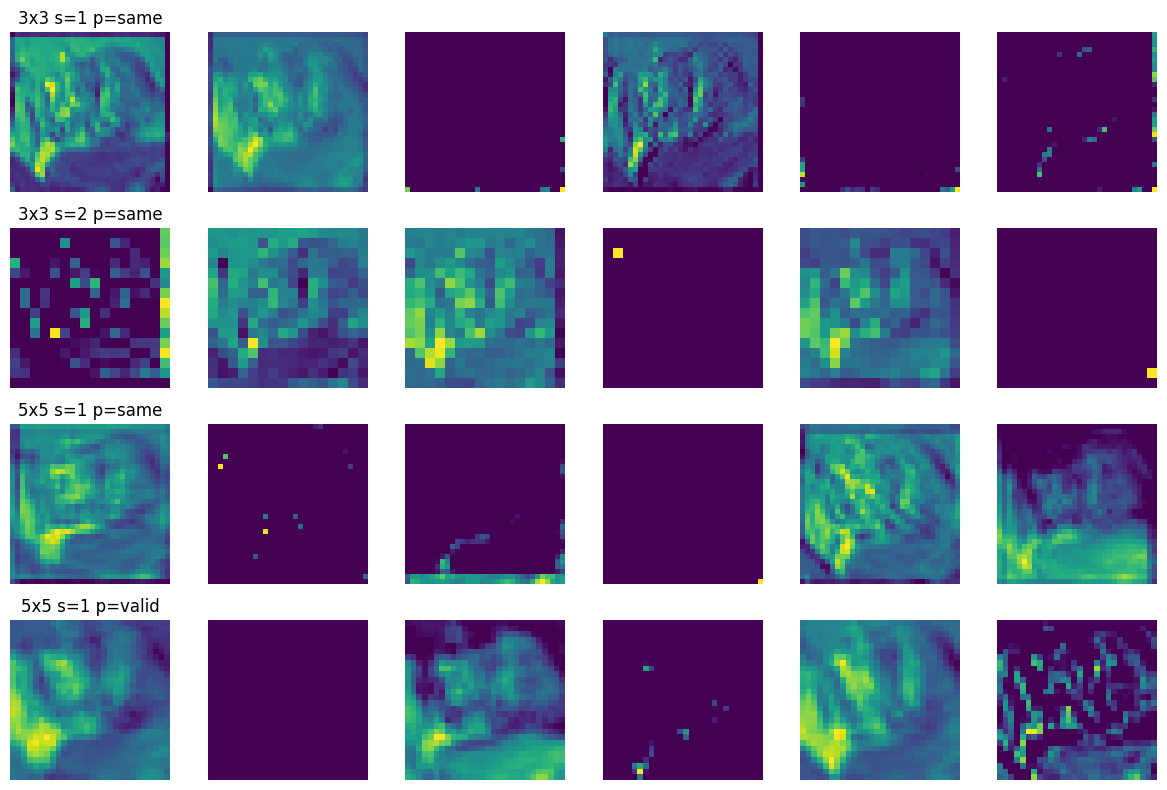

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers

# Load a sample from CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_sample = x_test[0:1] / 255.0

def build_model(kernel_size, stride, padding):
    model = models.Sequential([
        layers.Conv2D(16, kernel_size, strides=stride, padding=padding, activation='relu',
                      input_shape=(32, 32, 3)),
    ])
    return model

# Define configurations
configs = [
    (3, 1, 'same'),
    (3, 2, 'same'),
    (5, 1, 'same'),
    (5, 1, 'valid'),
]

fig, axes = plt.subplots(len(configs), 6, figsize=(12, 8))
for i, (k, s, p) in enumerate(configs):
    model = build_model((k, k), s, p)
    activations = model.predict(x_sample)
    for j in range(6):
        axes[i, j].imshow(activations[0, :, :, j], cmap='viridis')
        axes[i, j].axis('off')
    axes[i, 0].set_title(f'{k}x{k} s={s} p={p}')

plt.tight_layout()
plt.show()

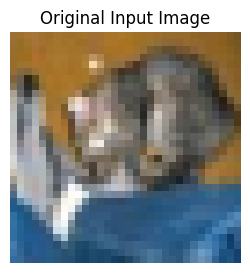

In [3]:
plt.figure(figsize=(3,3))
plt.imshow(x_sample[0])
plt.title('Original Input Image')
plt.axis('off')
plt.show()